In [114]:
import pandas as pd
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")
# Load the dataset
data = pd.read_csv('GoBank.csv')

# Display basic information about the dataset
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22940 entries, 0 to 22939
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         22940 non-null  object 
 1   Age                                22940 non-null  int64  
 2   Qualification                      22778 non-null  object 
 3   Occupation                         22940 non-null  object 
 4   Marital Status                     22940 non-null  object 
 5   Home Mortgage                      22940 non-null  object 
 6   Personal Loan                      22940 non-null  object 
 7   Has Other Bank Account             22940 non-null  object 
 8   Last Contact Direction             22893 non-null  object 
 9   Last Contact Duration              22799 non-null  float64
 10  Last Contact Month                 22940 non-null  object 
 11  Last Contact Weekday               22940 non-null  obj

In [115]:
data.isnull().sum()

CustomerID                             0
Age                                    0
Qualification                        162
Occupation                             0
Marital Status                         0
Home Mortgage                          0
Personal Loan                          0
Has Other Bank Account                 0
Last Contact Direction                47
Last Contact Duration                141
Last Contact Month                     0
Last Contact Weekday                   0
Number of Current Campaign Calls       0
Number of Previous Campaign Calls     26
Previous Campaign Outcome            206
RBA Cash Rate                          0
Employment Variation Rate              0
Consumer Confidence Index              0
Sale Outcome                           0
dtype: int64

In [116]:
print(data.describe())


                Age  Last Contact Duration  Number of Current Campaign Calls  \
count  22940.000000           22799.000000                      22940.000000   
mean      40.097602             282.378657                          2.542938   
std       10.799192             286.169219                          2.702480   
min       17.000000               0.000000                          1.000000   
25%       32.000000             108.000000                          1.000000   
50%       38.000000             192.000000                          2.000000   
75%       47.000000             350.000000                          3.000000   
max       98.000000            4918.000000                         56.000000   

       Number of Previous Campaign Calls  RBA Cash Rate  \
count                       22914.000000   22940.000000   
mean                            0.199441       3.495762   
std                             0.543349       1.785776   
min                             0.000000   

In [117]:
print(data.head())

  CustomerID  Age                              Qualification  \
0   CU318939   32  Graduate Diploma and Graduate Certificate   
1   CU935403   39            Bachelor Degree Level or Higher   
2   CU792919   36  Graduate Diploma and Graduate Certificate   
3   CU168904   44                          Primary Education   
4   CU442580   38  Graduate Diploma and Graduate Certificate   

                    Occupation Marital Status Home Mortgage Personal Loan  \
0       Technicians and Trades        Married           Yes            No   
1  Clerical and administrative        Married            No            No   
2       Technicians and Trades       Divorced            No            No   
3                     Labourer        Married           Yes            No   
4       Technicians and Trades        Married            No            No   

  Has Other Bank Account Last Contact Direction  Last Contact Duration  \
0                     No                Inbound                  172.0   
1   

## Data Preprocessing and Exploratory Data Analysis (EDA)


<Figure size 1200x800 with 0 Axes>

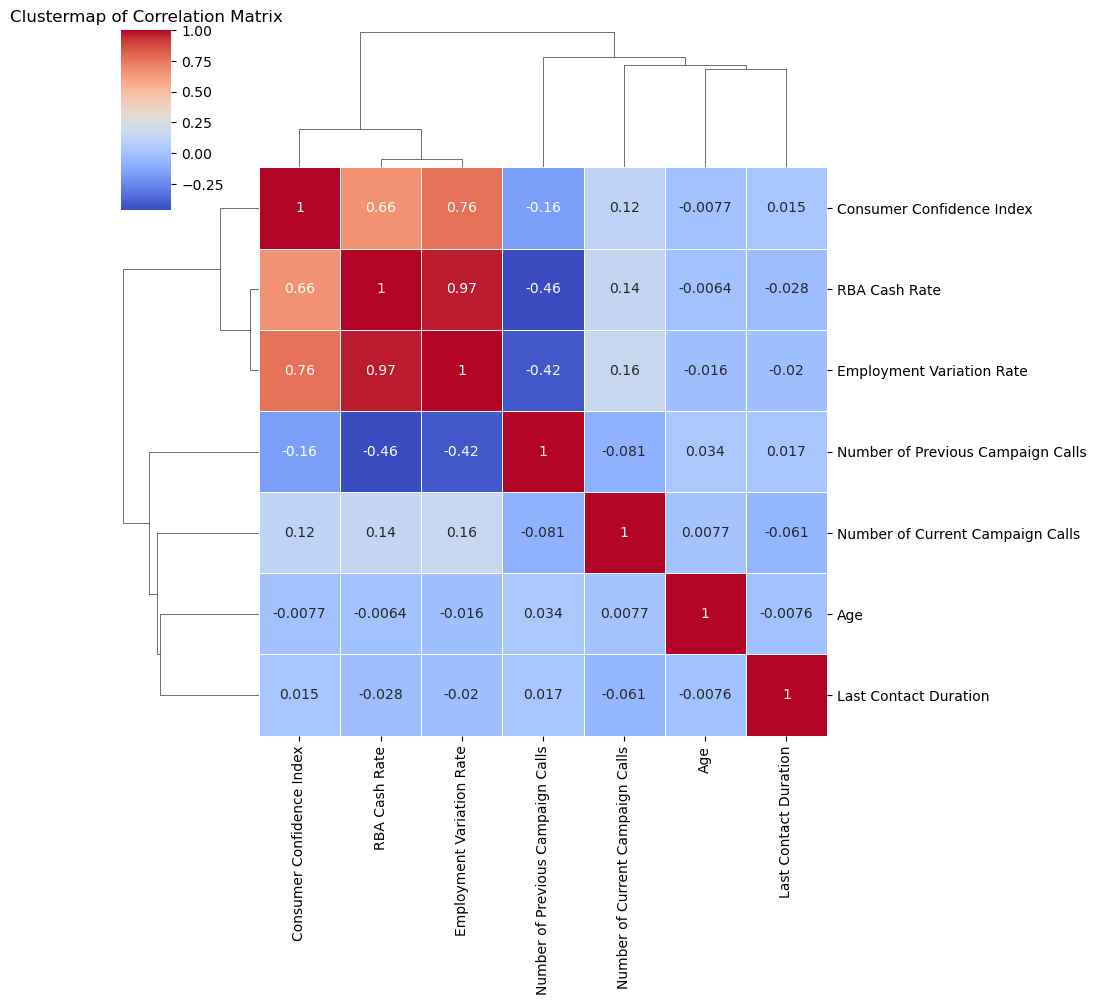

In [118]:
# Drop non-numeric columns and ID columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Fill missing values if necessary
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a clustermap
plt.figure(figsize=(12, 8))
sns.clustermap(correlation_matrix, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Clustermap of Correlation Matrix')
plt.show()


In [119]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Fill missing values
data['Qualification'].fillna(data['Qualification'].mode()[0], inplace=True)
data['Last Contact Direction'].fillna(data['Last Contact Direction'].mode()[0], inplace=True)
data['Last Contact Duration'].fillna(data['Last Contact Duration'].mean(), inplace=True)
data['Number of Previous Campaign Calls'].fillna(data['Number of Previous Campaign Calls'].mean(), inplace=True)
data['Previous Campaign Outcome'].fillna(data['Previous Campaign Outcome'].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Qualification', 'Occupation', 'Marital Status', 'Home Mortgage', 'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction', 'Last Contact Month', 'Last Contact Weekday', 'Previous Campaign Outcome', 'Sale Outcome']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
numerical_columns = ['Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the processed dataset
print(data.head())


  CustomerID       Age  Qualification  Occupation  Marital Status  \
0   CU318939 -0.749850              1          10               1   
1   CU935403 -0.101640              0           0               1   
2   CU792919 -0.379444              1          10               0   
3   CU168904  0.361368              5           4               1   
4   CU442580 -0.194241              1          10               1   

   Home Mortgage  Personal Loan  Has Other Bank Account  \
0              2              0                       0   
1              0              0                       0   
2              0              0                       0   
3              2              0                       0   
4              0              0                       0   

   Last Contact Direction  Last Contact Duration  Last Contact Month  \
0                       0              -0.386911                   3   
1                       1               1.618122                   6   
2             

In [120]:
data.isnull().sum()

CustomerID                           0
Age                                  0
Qualification                        0
Occupation                           0
Marital Status                       0
Home Mortgage                        0
Personal Loan                        0
Has Other Bank Account               0
Last Contact Direction               0
Last Contact Duration                0
Last Contact Month                   0
Last Contact Weekday                 0
Number of Current Campaign Calls     0
Number of Previous Campaign Calls    0
Previous Campaign Outcome            0
RBA Cash Rate                        0
Employment Variation Rate            0
Consumer Confidence Index            0
Sale Outcome                         0
dtype: int64

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('GoBank.csv')

# Fill missing values
data['Qualification'].fillna(data['Qualification'].mode()[0], inplace=True)
data['Last Contact Direction'].fillna(data['Last Contact Direction'].mode()[0], inplace=True)
data['Last Contact Duration'].fillna(data['Last Contact Duration'].mean(), inplace=True)
data['Number of Previous Campaign Calls'].fillna(data['Number of Previous Campaign Calls'].mean(), inplace=True)
data['Previous Campaign Outcome'].fillna(data['Previous Campaign Outcome'].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Qualification', 'Occupation', 'Marital Status', 'Home Mortgage', 'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction', 'Last Contact Month', 'Last Contact Weekday', 'Previous Campaign Outcome', 'Sale Outcome']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
numerical_columns = ['Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the processed dataset
print(data.head())



  CustomerID       Age  Qualification  Occupation  Marital Status  \
0   CU318939 -0.749850              1          10               1   
1   CU935403 -0.101640              0           0               1   
2   CU792919 -0.379444              1          10               0   
3   CU168904  0.361368              5           4               1   
4   CU442580 -0.194241              1          10               1   

   Home Mortgage  Personal Loan  Has Other Bank Account  \
0              2              0                       0   
1              0              0                       0   
2              0              0                       0   
3              2              0                       0   
4              0              0                       0   

   Last Contact Direction  Last Contact Duration  Last Contact Month  \
0                       0              -0.386911                   3   
1                       1               1.618122                   6   
2             

# EDA

## Correlation Map


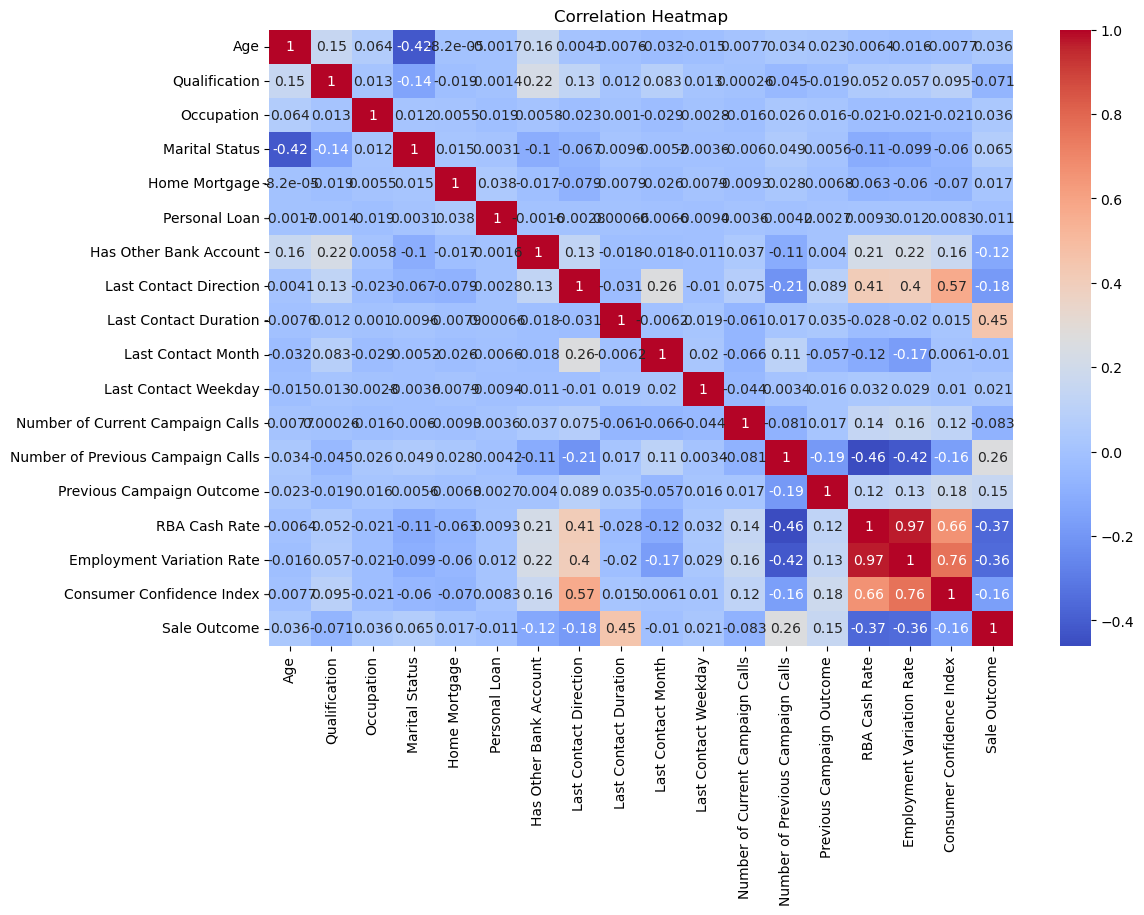

In [122]:
# Exclude CustomerID from the correlation heatmap
data_corr = data.drop(columns=['CustomerID'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Visual Analysis of Sale Outcome Factors

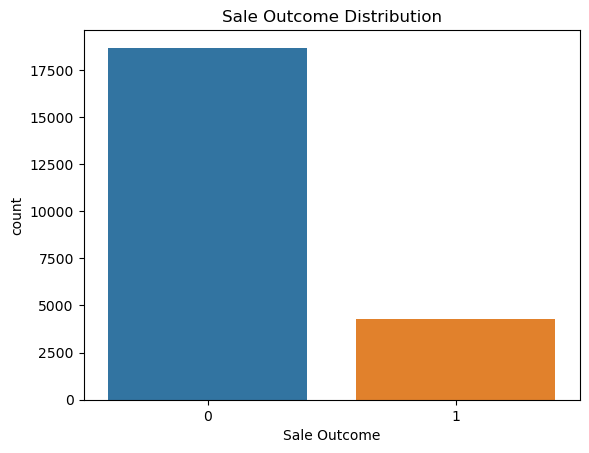

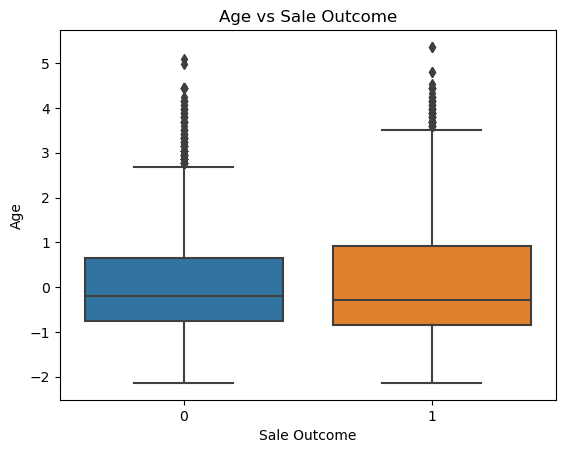

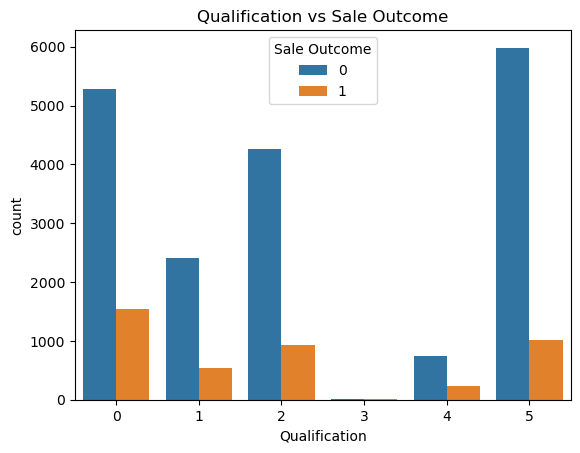

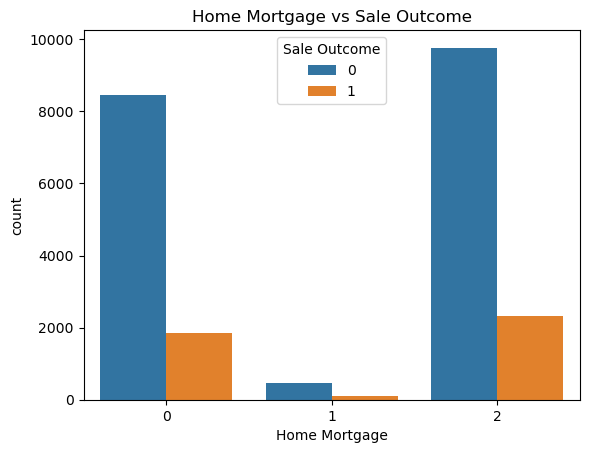

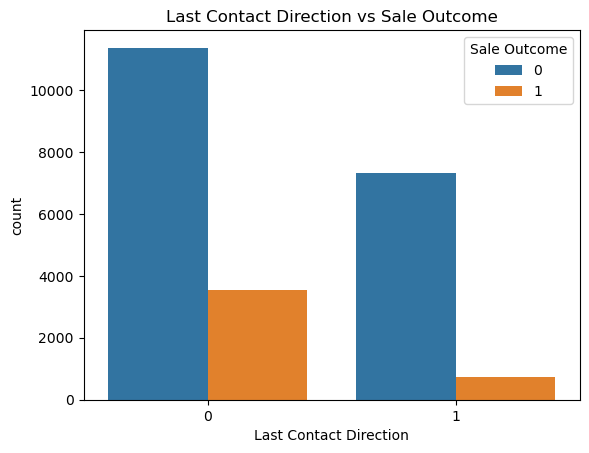

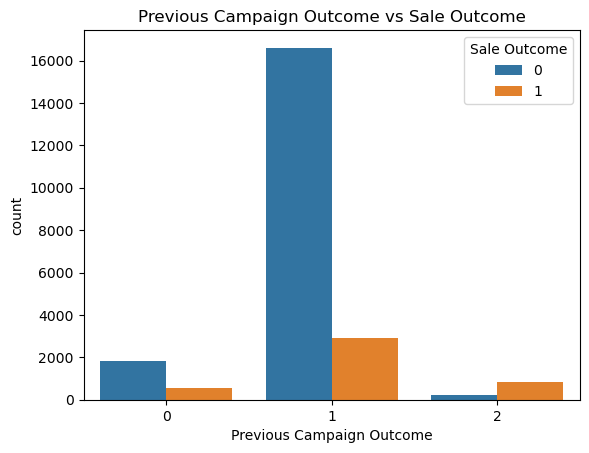

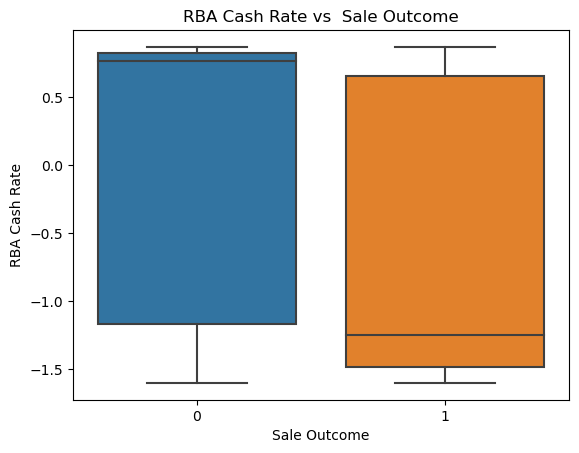

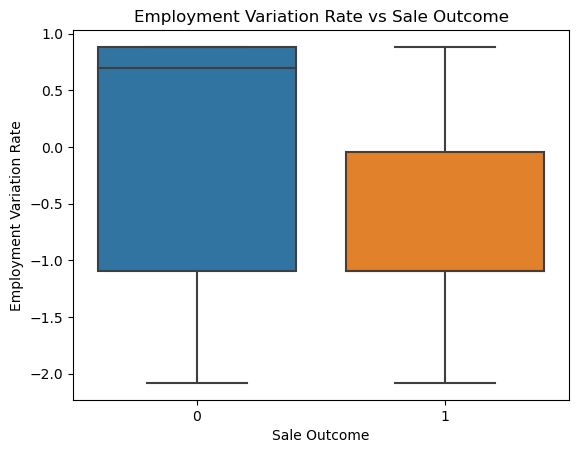

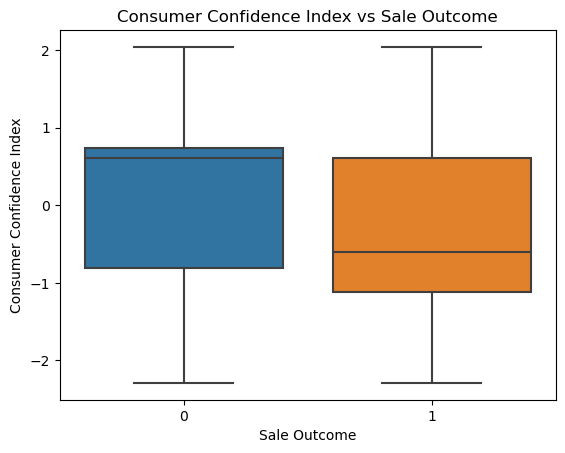

In [123]:
# Sale Outcome distribution
sns.countplot(x='Sale Outcome', data=data)
plt.title('Sale Outcome Distribution')
plt.show()

# Age vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Age', data=data)
plt.title('Age vs Sale Outcome')
plt.show()

# Qualification vs Sale Outcome
sns.countplot(x='Qualification', hue='Sale Outcome', data=data)
plt.title('Qualification vs Sale Outcome')
plt.show()

# Home Mortgage vs Sale Outcome
sns.countplot(x='Home Mortgage', hue='Sale Outcome', data=data)
plt.title('Home Mortgage vs Sale Outcome')
plt.show()

# Last Contact Direction vs Sale Outcome
sns.countplot(x='Last Contact Direction', hue='Sale Outcome', data=data)
plt.title('Last Contact Direction vs Sale Outcome')
plt.show()

# Previous Campaign Outcome vs Sale Outcome
sns.countplot(x='Previous Campaign Outcome', hue='Sale Outcome', data=data)
plt.title('Previous Campaign Outcome vs Sale Outcome')
plt.show()

# Economic indicators vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='RBA Cash Rate', data=data)
plt.title('RBA Cash Rate vs  Sale Outcome')
plt.show()

sns.boxplot(x='Sale Outcome', y='Employment Variation Rate', data=data)
plt.title('Employment Variation Rate vs Sale Outcome')
plt.show()

sns.boxplot(x='Sale Outcome', y='Consumer Confidence Index', data=data)
plt.title('Consumer Confidence Index vs Sale Outcome')
plt.show()

The code provides a visual analysis of factors related to the 'Sale Outcome' in a dataset. Here's a breakdown of each visualization and its purpose:

## Sale Outcome Distribution:

This plot shows the distribution of the 'Sale Outcome' variable, indicating the frequency of 'Sale' and 'No Sale' outcomes.
## Age vs Sale Outcome:

This boxplot compares the distribution of ages between customers who made a sale and those who did not, providing insights into how age may influence the sale outcome.
## Qualification vs Sale Outcome:

This countplot displays the distribution of qualification levels among customers, categorized by their sale outcomes, helping to identify any correlation between education level and sale success.
## Home Mortgage vs Sale Outcome:

This countplot illustrates whether customers with a home mortgage are more likely to make a sale compared to those without, aiding in understanding the impact of home mortgages on sale outcomes.
## Last Contact Direction vs Sale Outcome:

This countplot shows how the direction of the last contact (inbound or outbound) correlates with sale outcomes, revealing whether one contact method is more effective than the other.
## Previous Campaign Outcome vs Sale Outcome:

This countplot examines the relationship between the outcome of previous marketing campaigns and the current sale outcome, indicating if past campaign success influences future sales.
## RBA Cash Rate vs Sale Outcome:

This boxplot visualizes how the RBA cash rate (an economic indicator) varies among customers based on their sale outcomes, helping to understand the impact of economic factors on sales.
## Employment Variation Rate vs Sale Outcome:

This boxplot compares the employment variation rate among customers who made a sale versus those who did not, exploring the influence of employment trends on sale success.
## Consumer Confidence Index vs Sale Outcome:

This boxplot shows the distribution of the consumer confidence index among customers, categorized by their sale outcomes, providing insights into the relationship between consumer sentiment and sales.
Overall, these visualizations offer a comprehensive understanding of how various demographic, economic, and campaign-related factors contribute to sales outcomes in the dataset.

## Visual Analysis of Sale Outcome Factors

This below code sets up a matplotlib figure with multiple subplots to provide a visual analysis of factors related to the 'Sale Outcome' in a dataset. Each subplot represents a different analysis, including the distribution of sale outcomes, the relationship between age and sale outcomes, the influence of qualification and home mortgage on sale outcomes, the impact of the last contact direction and previous campaign outcomes, and the association between economic indicators (RBA Cash Rate, Employment Variation Rate, Consumer Confidence Index) and sale outcomes. The plots facilitate easy comparison and interpretation of how various demographic, campaign-related, and economic factors affect the likelihood of a successful sale.

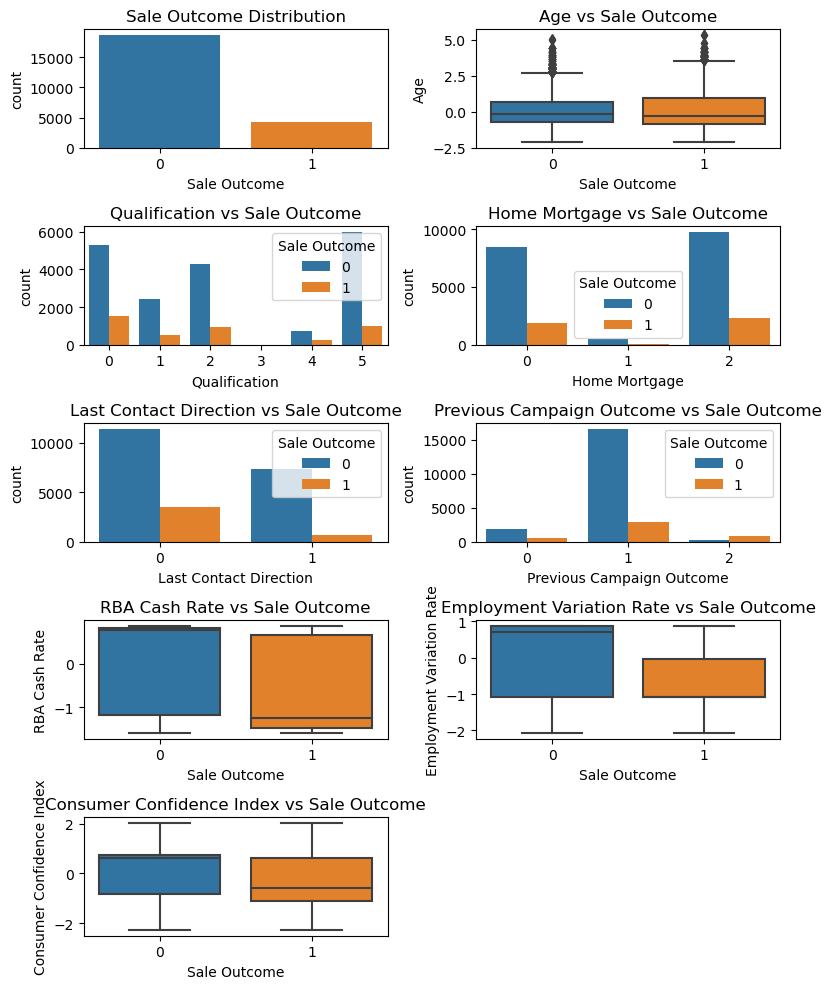

In [124]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))

# Sale Outcome distribution
sns.countplot(x='Sale Outcome', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Sale Outcome Distribution')

# Age vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Age', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Sale Outcome')

# Qualification vs Sale Outcome
sns.countplot(x='Qualification', hue='Sale Outcome', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Qualification vs Sale Outcome')

# Home Mortgage vs Sale Outcome
sns.countplot(x='Home Mortgage', hue='Sale Outcome', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Home Mortgage vs Sale Outcome')

# Last Contact Direction vs Sale Outcome
sns.countplot(x='Last Contact Direction', hue='Sale Outcome', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Last Contact Direction vs Sale Outcome')

# Previous Campaign Outcome vs Sale Outcome
sns.countplot(x='Previous Campaign Outcome', hue='Sale Outcome', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Previous Campaign Outcome vs Sale Outcome')

# RBA Cash Rate vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='RBA Cash Rate', data=data, ax=axes[3, 0])
axes[3, 0].set_title('RBA Cash Rate vs Sale Outcome')

# Employment Variation Rate vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Employment Variation Rate', data=data, ax=axes[3, 1])
axes[3, 1].set_title('Employment Variation Rate vs Sale Outcome')

# Consumer Confidence Index vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Consumer Confidence Index', data=data, ax=axes[4, 0])
axes[4, 0].set_title('Consumer Confidence Index vs Sale Outcome')

# Hide the last unused subplot (axes[4, 1])
fig.delaxes(axes[4, 1])

plt.tight_layout()
plt.show()

# Questions to address from GOBank.csv Dataset

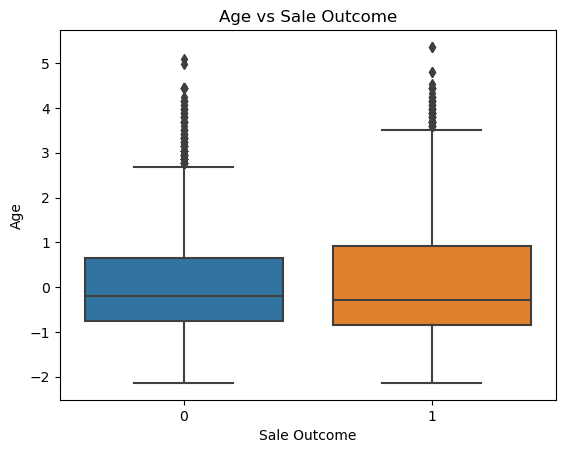

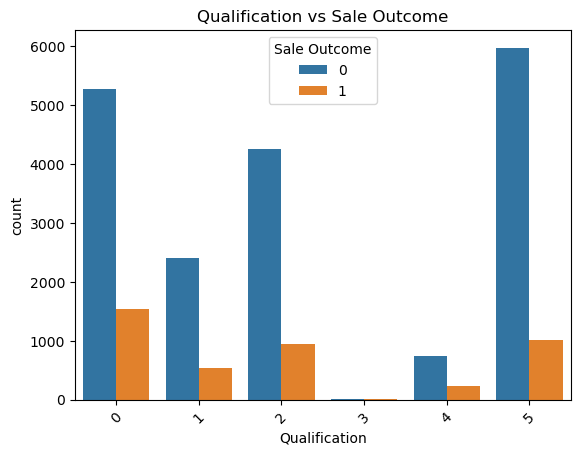

In [125]:
# 1. Demographic details influence on sales outcomes
# Age vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Age', data=data)
plt.title('Age vs Sale Outcome')
plt.show()

# Qualification vs Sale Outcome
sns.countplot(x='Qualification', hue='Sale Outcome', data=data)
plt.title('Qualification vs Sale Outcome')
plt.xticks(rotation=45)
plt.show()



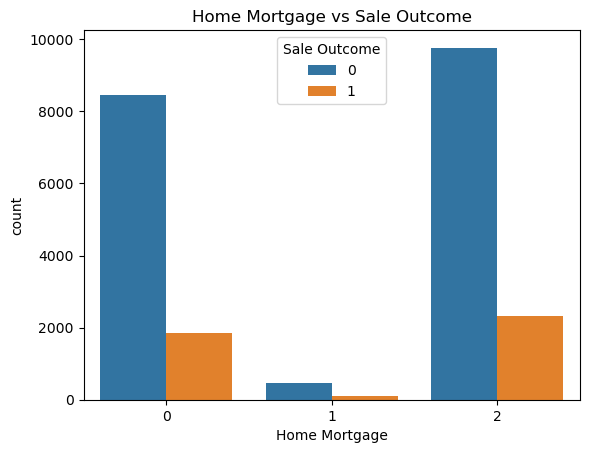

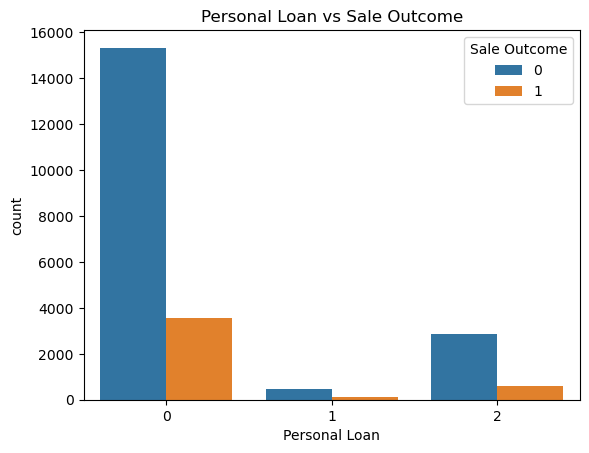

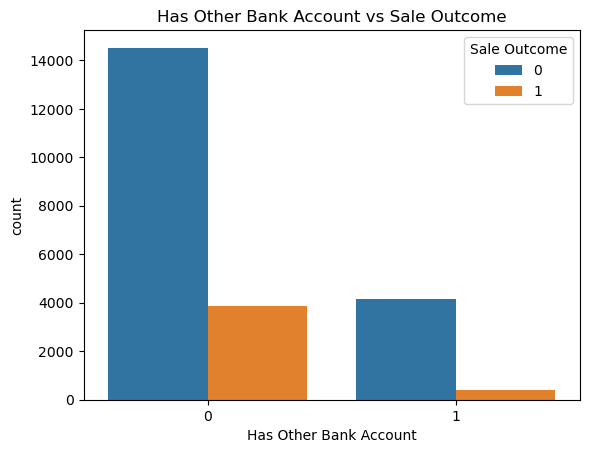

In [126]:

# 2. Influence of having different types of accounts on Sale Outcome
# Home Mortgage vs Sale Outcome
sns.countplot(x='Home Mortgage', hue='Sale Outcome', data=data)
plt.title('Home Mortgage vs Sale Outcome')
plt.show()

# Personal Loan vs Sale Outcome
sns.countplot(x='Personal Loan', hue='Sale Outcome', data=data)
plt.title('Personal Loan vs Sale Outcome')
plt.show()

# Has Other Bank Account vs Sale Outcome
sns.countplot(x='Has Other Bank Account', hue='Sale Outcome', data=data)
plt.title('Has Other Bank Account vs Sale Outcome')
plt.show()




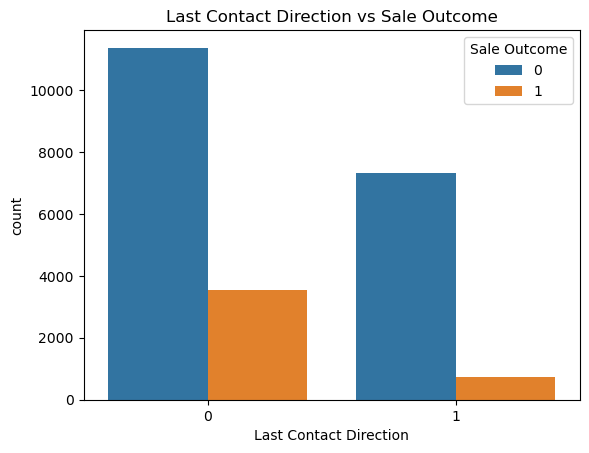

In [127]:
# 3. Influence of last contact method on Sale Outcome
sns.countplot(x='Last Contact Direction', hue='Sale Outcome', data=data)
plt.title('Last Contact Direction vs Sale Outcome')
plt.show()



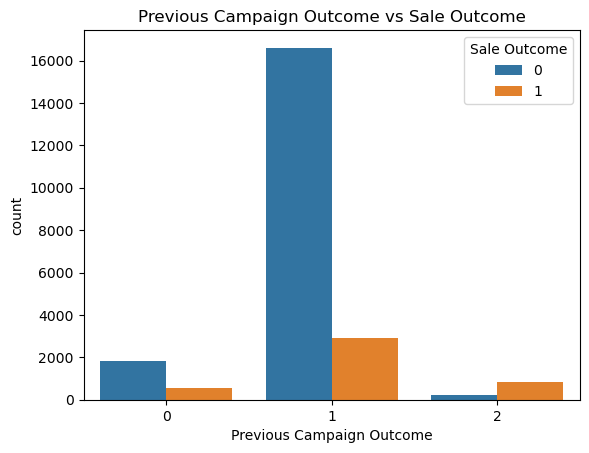

In [128]:
# 4. Influence of previous campaign outcome on Sale Outcome
sns.countplot(x='Previous Campaign Outcome', hue='Sale Outcome', data=data)
plt.title('Previous Campaign Outcome vs Sale Outcome')
plt.show()



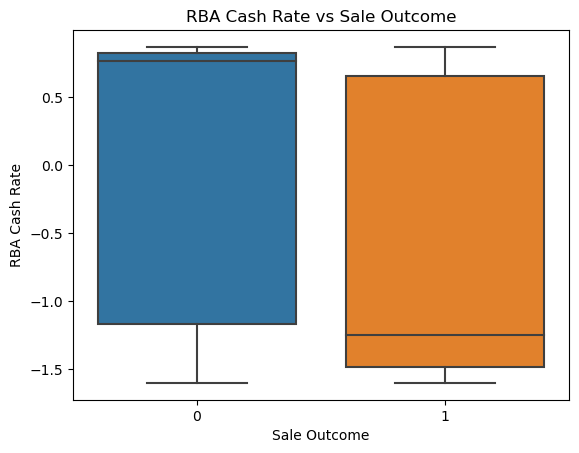

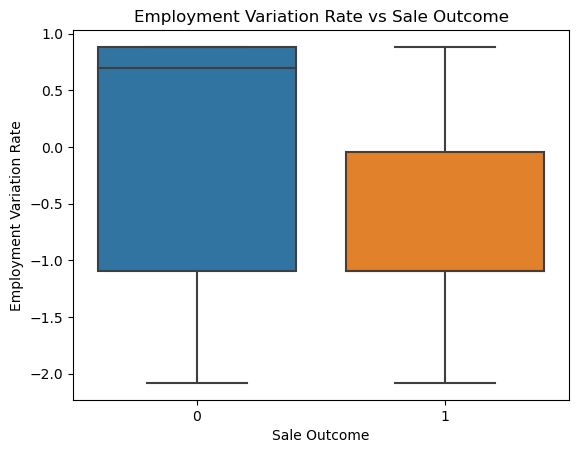

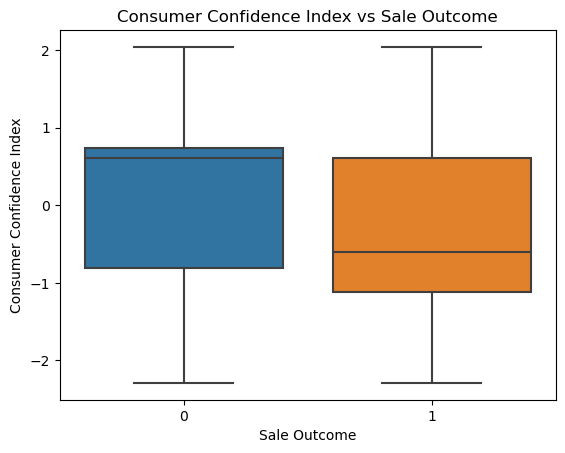

In [129]:
# 5. Impact of economic indicators on Sale Outcomes
# RBA Cash Rate vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='RBA Cash Rate', data=data)
plt.title('RBA Cash Rate vs Sale Outcome')
plt.show()

# Employment Variation Rate vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Employment Variation Rate', data=data)
plt.title('Employment Variation Rate vs Sale Outcome')
plt.show()

# Consumer Confidence Index vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Consumer Confidence Index', data=data)
plt.title('Consumer Confidence Index vs Sale Outcome')
plt.show()

# 6. Exploration of other factors affecting sales outcomes
# Additional analysis can be performed here based on the specific business context and available data.


## Predictive Machine Learning Model
We'll use Logistic Regression to predict 'Sale' or 'No Sale'.

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into features and target variable
X = data.drop(columns=['CustomerID', 'Sale Outcome'])
y = data['Sale Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Logistics Regression Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Logistics Regression Accuracy: 0.8801220575414124
Confusion Matrix:
[[5366  220]
 [ 605  691]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5586
           1       0.76      0.53      0.63      1296

    accuracy                           0.88      6882
   macro avg       0.83      0.75      0.78      6882
weighted avg       0.87      0.88      0.87      6882



## Clustering

### Elbow Method

The elbow method is a heuristic used to determine the optimal number of clusters in a dataset. It works by plotting the within-cluster sum of squares (WCSS) against the number of clusters. The WCSS measures the compactness of the clusters, where lower values indicate that the points within each cluster are closer to their centroids.

In the elbow method, we look for the "elbow point" on the plot, which is the point where the rate of decrease in WCSS starts to slow down. This point indicates the optimal number of clusters, as adding more clusters beyond this point doesn't significantly reduce the WCSS.

For our dataset, when the elbow method suggests 10 as the optimal number of clusters, it implies that the rate of decrease in WCSS slows down around this value. Therefore, dividing the data into 10 clusters captures a substantial amount of variance while avoiding overfitting.

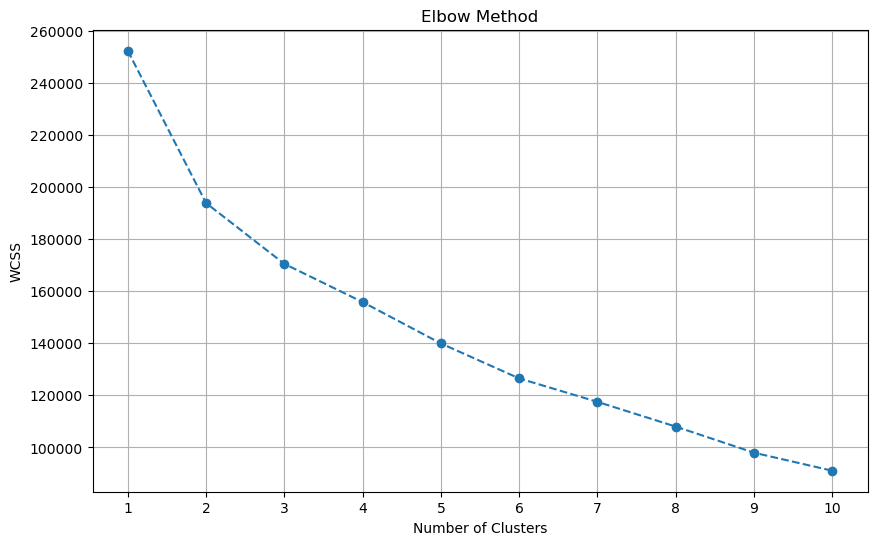

In [141]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


### Silhoute Score

The silhouette score is a measure used to assess the quality of a clustering technique by evaluating how well each data point fits into its assigned cluster compared to other clusters. Ranging from -1 to 1, a high silhouette score indicates that data points are well-clustered and have strong cohesion within their cluster while being distinctly separated from neighboring clusters.

In our analysis, with silhouette scores spanning from 0.23 to 0.28 on the y-axis, it suggests that the clustering method effectively separates data points into distinct clusters. A score within this range signifies that the clusters are reasonably well-defined and sufficiently separated, indicating a meaningful partitioning of the data. Therefore, when the silhouette score method identifies 10 as the optimal number of clusters, it implies that dividing the data into 10 clusters yields well-separated and cohesive clusters, reflecting the inherent structure of the data effectively captured by this clustering configuration.

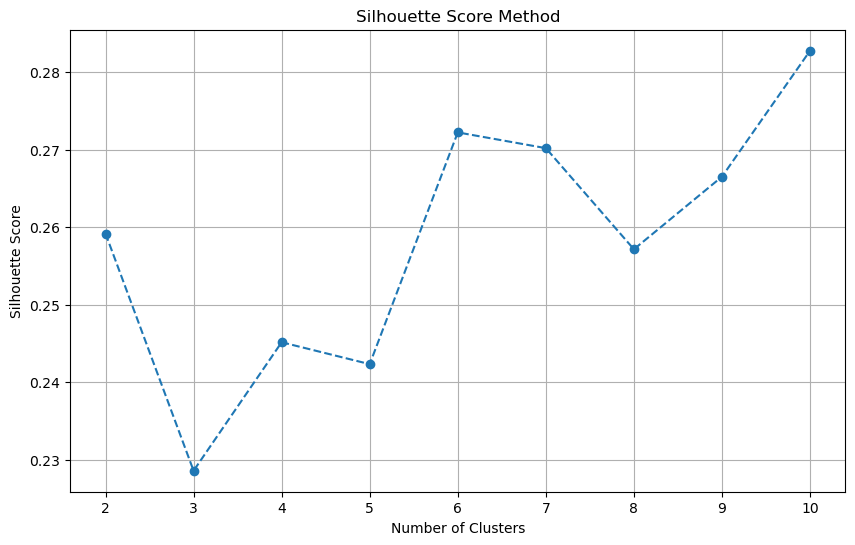

In [142]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11, 1))
plt.grid(True)
plt.show()


## K-means Clustering

## Clustering Model
We'll use K-Means Clustering to identify customer segments.

In [144]:
# Drop non-numeric columns if necessary
data_numeric = data.drop(['CustomerID', 'Qualification', 'Occupation', 'Marital Status', 'Last Contact Direction', 'Last Contact Month', 'Last Contact Weekday', 'Previous Campaign Outcome', 'Sale Outcome'], axis=1)

# Check for and handle missing values if necessary
data_numeric.dropna(inplace=True)

# Check data types of all columns
print(data_numeric.dtypes)

# Convert data to numeric if necessary
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values after conversion
data_numeric.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Based on the elbow method, choose the optimal number of clusters
# Let's say we choose 3 clusters
n_clusters = 10

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Print the counts of each cluster
print(data['Cluster'].value_counts())

# You can analyze the characteristics of each cluster using groupby or visualize them using plots

Age                                  float64
Home Mortgage                          int32
Personal Loan                          int32
Has Other Bank Account                 int32
Last Contact Duration                float64
Number of Current Campaign Calls     float64
Number of Previous Campaign Calls    float64
RBA Cash Rate                        float64
Employment Variation Rate            float64
Consumer Confidence Index            float64
Cluster                                int32
dtype: object
Cluster
3    4197
0    3934
9    3549
7    3270
5    2606
8    1850
2    1449
6     802
1     745
4     538
Name: count, dtype: int64


In [145]:
import seaborn as sns

# Pairplot with hue as cluster labels
sns.pairplot(data=data, hue='Cluster')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000016875D9B4C0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Box plot for each feature with cluster labels
plt.figure(figsize=(16, 10))
for i, column in enumerate(data_numeric.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Cluster', y=column, data=data)
plt.tight_layout()
plt.show()
